In [301]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

In [302]:
# # กำหนดช่วงเวลา
# start_date = datetime(2022, 1, 1)
# end_date = datetime.now()
# period_length = timedelta(days=60)  # แบ่งดึงทีละ 60 วัน

# # สร้าง DataFrame เปล่าสำหรับเก็บข้อมูลทั้งหมด
# all_data = pd.DataFrame()

# # วนลูปดึงข้อมูลทีละช่วง
# current_start = start_date
# while current_start < end_date:
#     # คำนวณวันสิ้นสุดของช่วงปัจจุบัน
#     current_end = min(current_start + period_length, end_date)
    
#     print(f"กำลังดึงข้อมูลจาก {current_start.strftime('%Y-%m-%d')} ถึง {current_end.strftime('%Y-%m-%d')}...")
    
#     # ดึงข้อมูลสำหรับช่วงปัจจุบัน
#     chunk = yf.download("GC=F", 
#                         start=current_start.strftime('%Y-%m-%d'),
#                         end=current_end.strftime('%Y-%m-%d'),
#                         interval="1h")
    
#     # เพิ่มข้อมูลเข้าใน DataFrame หลัก
#     all_data = pd.concat([all_data, chunk])
    
#     # เลื่อนวันเริ่มต้นไปยังช่วงถัดไป
#     current_start = current_end + timedelta(days=1)

# # บันทึกข้อมูลทั้งหมดลง CSV
# all_data.to_csv("gold.csv")

In [303]:
df = pd.read_csv("gold.csv")
df.head()

,Price,Adj Closes,Close,High,Low,Open,Volume
0,Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
1,2023-03-09 05:00:00+00:00,NaN,1818.599976,1819.699951,1817.300049,1817.800049,0
2,2023-03-09 06:00:00+00:00,NaN,1817,1819.199951,1816.5,1818.599976,2557
3,2023-03-09 07:00:00+00:00,NaN,1818.400024,1819.099976,1816.199951,1816.900024,6610
4,2023-03-09 08:00:00+00:00,NaN,1820.900024,1823.199951,1817.099976,1818.400024,13318


In [304]:
df.drop(columns=["Adj Closes"], inplace=True)
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
1,2023-03-09 05:00:00+00:00,1818.599976,1819.699951,1817.300049,1817.800049,0
2,2023-03-09 06:00:00+00:00,1817,1819.199951,1816.5,1818.599976,2557
3,2023-03-09 07:00:00+00:00,1818.400024,1819.099976,1816.199951,1816.900024,6610
4,2023-03-09 08:00:00+00:00,1820.900024,1823.199951,1817.099976,1818.400024,13318


In [305]:
df = df.drop(index=0)
df = df.reset_index(drop=True)
df.head()

,Price,Close,High,Low,Open,Volume
0,2023-03-09 05:00:00+00:00,1818.599976,1819.699951,1817.300049,1817.800049,0
1,2023-03-09 06:00:00+00:00,1817,1819.199951,1816.5,1818.599976,2557
2,2023-03-09 07:00:00+00:00,1818.400024,1819.099976,1816.199951,1816.900024,6610
3,2023-03-09 08:00:00+00:00,1820.900024,1823.199951,1817.099976,1818.400024,13318
4,2023-03-09 09:00:00+00:00,1820.800049,1822.599976,1820,1820.800049,3693


In [306]:
df.dtypes

Price     object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

In [307]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df.dtypes

Price      object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [308]:
df['Price'] = pd.to_datetime(df['Price'])
df['year'] = df['Price'].dt.year
df['month'] = df['Price'].dt.month
df['day'] = df['Price'].dt.day
df['dayofweek'] = df['Price'].dt.dayofweek
df['quarter'] = df['Price'].dt.quarter
df['hour'] = df['Price'].dt.hour

In [309]:
df['Close_lag_1week'] = df['Close'].shift(192)
df.tail()

,Price,Close,High,Low,Open,Volume,year,month,day,dayofweek,quarter,hour,Close_lag_1week
11252,2025-03-06 00:00:00+00:00,2925.100098,2929.199951,2925.000000,2927.399902,1907,2025,3,6,3,1,0,2942.500000
11253,2025-03-06 01:00:00+00:00,2933.300049,2935.300049,2924.000000,2925.100098,3706,2025,3,6,3,1,1,2950.399902
11254,2025-03-06 02:00:00+00:00,2934.800049,2935.899902,2931.100098,2933.399902,3229,2025,3,6,3,1,2,2953.899902
11255,2025-03-06 03:00:00+00:00,2929.800049,2935.000000,2928.300049,2934.899902,2191,2025,3,6,3,1,3,2958.500000
11256,2025-03-06 04:00:00+00:00,2926.899902,2930.300049,2925.500000,2929.899902,2263,2025,3,6,3,1,4,2947.399902


In [310]:
df['SMA_7'] = df['Close'].shift(168).rolling(window=192).mean()
df['Close_rolling_std_7'] = df['Close'].shift(192).rolling(window=192).std()
df.tail()

,Price,Close,High,Low,Open,Volume,year,month,day,dayofweek,quarter,hour,Close_lag_1week,SMA_7,Close_rolling_std_7
11252,2025-03-06 00:00:00+00:00,2925.100098,2929.199951,2925.000000,2927.399902,1907,2025,3,6,3,1,0,2942.500000,2940.304170,18.904297
11253,2025-03-06 01:00:00+00:00,2933.300049,2935.300049,2924.000000,2925.100098,3706,2025,3,6,3,1,1,2950.399902,2940.514586,18.925054
11254,2025-03-06 02:00:00+00:00,2934.800049,2935.899902,2931.100098,2933.399902,3229,2025,3,6,3,1,2,2953.899902,2940.754690,18.964442
11255,2025-03-06 03:00:00+00:00,2929.800049,2935.000000,2928.300049,2934.899902,2191,2025,3,6,3,1,3,2958.500000,2941.032815,19.027008
11256,2025-03-06 04:00:00+00:00,2926.899902,2930.300049,2925.500000,2929.899902,2263,2025,3,6,3,1,4,2947.399902,2941.331774,19.032878


In [311]:
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()

In [312]:
df['Close_rolling_max_7'] = df['Close'].shift(192).rolling(window=192).max()
df['Close_rolling_min_7'] = df['Close'].shift(192).rolling(window=192).min()

In [313]:
df['Price_Change'] = df['Close'].shift(168).diff()

In [314]:
df['Gain'] = df['Price_Change'].where(df['Price_Change'] > 0, 0)
df['Loss'] = -df['Price_Change'].where(df['Price_Change'] < 0, 0)

In [315]:
df['Avg_Gain'] = df['Gain'].rolling(window=336).mean()
df['Avg_Loss'] = df['Loss'].rolling(window=336).mean()

In [316]:
df['RS'] = df['Avg_Gain'] / df['Avg_Loss']

In [317]:
df['RSI'] = 100 - (100 / (1 + df['RS']))

In [318]:
df['EMA_1week'] = df['Close'].shift(168).ewm(span=168, adjust=False).mean()
df['EMA_2week'] = df['Close'].shift(336).ewm(span=336, adjust=False).mean()

# คำนวณ MACD Line
df['MACD'] = df['EMA_1week'] - df['EMA_2week']

# คำนวณ Signal Line (9-period EMA ของ MACD Line)
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# คำนวณ MACD Histogram
df['Histogram'] = df['MACD'] - df['Signal']

In [319]:
df['Price_Change'] = df['Close'].shift(168).diff()
df['Volume_Profit'] = df['Volume'].shift(168) * df['Price_Change']

In [320]:
df.columns

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume', 'year', 'month',
       'day', 'dayofweek', 'quarter', 'hour', 'Close_lag_1week', 'SMA_7',
       'Close_rolling_std_7', 'EMA_5', 'Close_rolling_max_7',
       'Close_rolling_min_7', 'Price_Change', 'Gain', 'Loss', 'Avg_Gain',
       'Avg_Loss', 'RS', 'RSI', 'EMA_1week', 'EMA_2week', 'MACD', 'Signal',
       'Histogram', 'Volume_Profit'],
      dtype='object')

In [321]:
df.dropna(inplace=True)

In [322]:
df = df.drop(columns=(['High', 'Low', 'Open', 'Volume']))

In [323]:
df.set_index('Price', inplace=True)

In [324]:
df.to_csv("gold_model.csv")

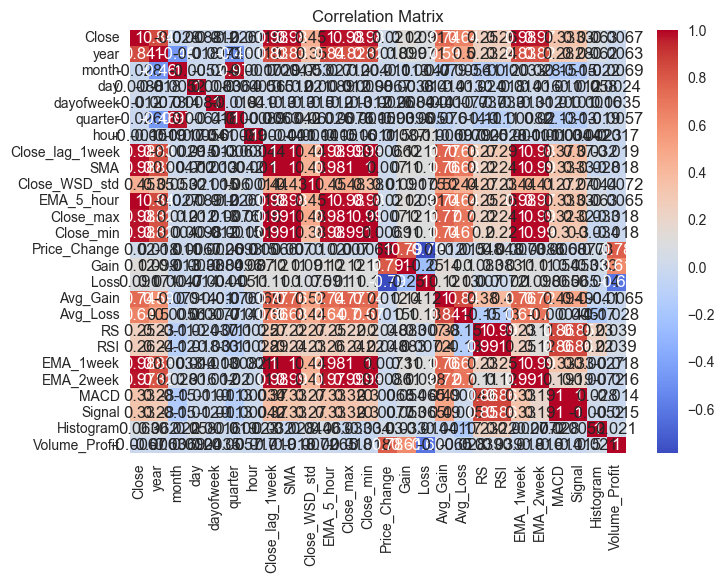

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df_model.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [326]:
df_predict.to_csv("gold_predict.csv", index=False)